<a href="https://colab.research.google.com/github/vioindr/Data-Analyst/blob/main/eksplorasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lima Baris Pertama Data:
  nasabah_id  umur jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22     Perempuan     5800000          1508000   
1       N002    64     Perempuan     5700000          1254000   
2       N003    27     Perempuan     2950000           590000   
3       N004    34     Perempuan     3100000           186000   
4       N005    45     Laki-Laki     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19      tabungan                          1   
1                 9  kartu_kredit                          2   
2                12      tabungan                          1   
3                16      deposito                          5   
4                15  kartu_kredit                          3   

  pengguna_mobile_banking  skor_kredit  
0                   TIDAK          900  
1                   TIDAK          900  
2                      YA          500  
3                   TIDAK         

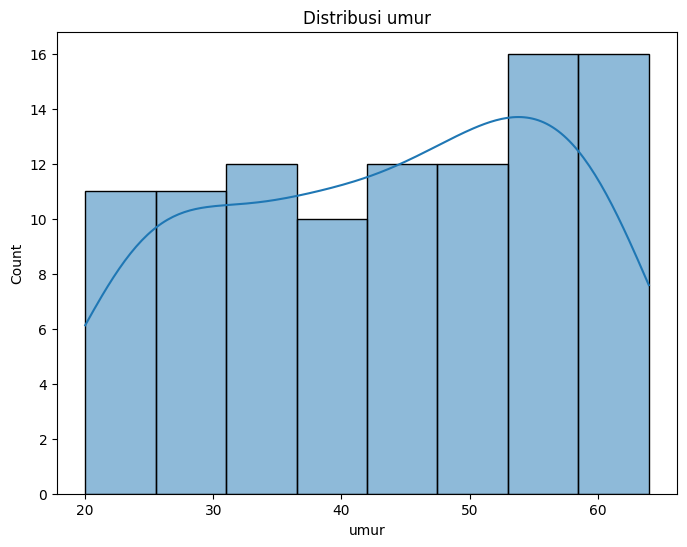

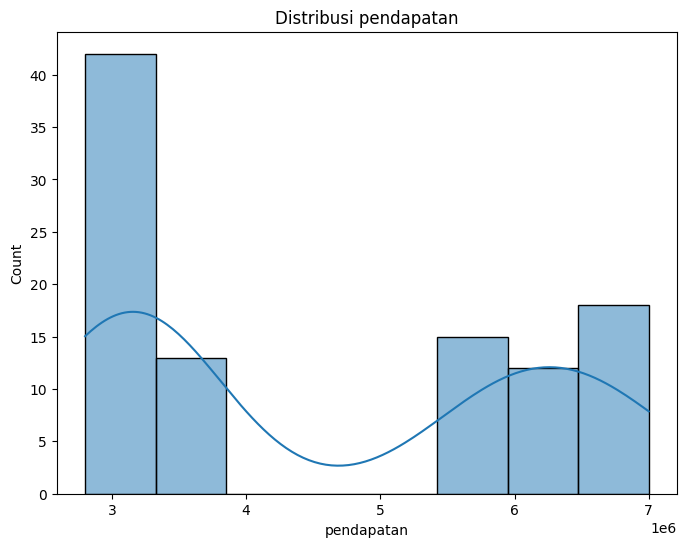

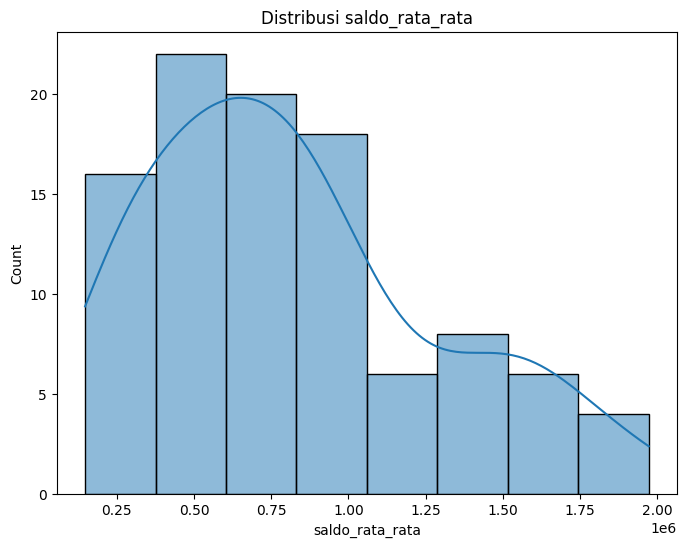

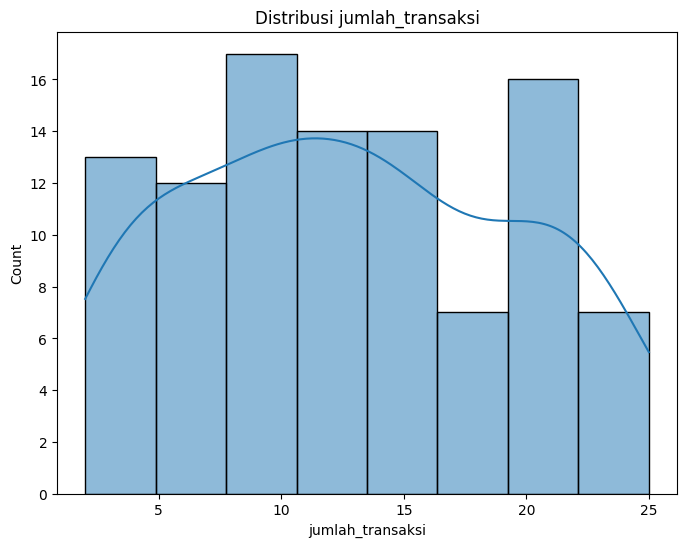

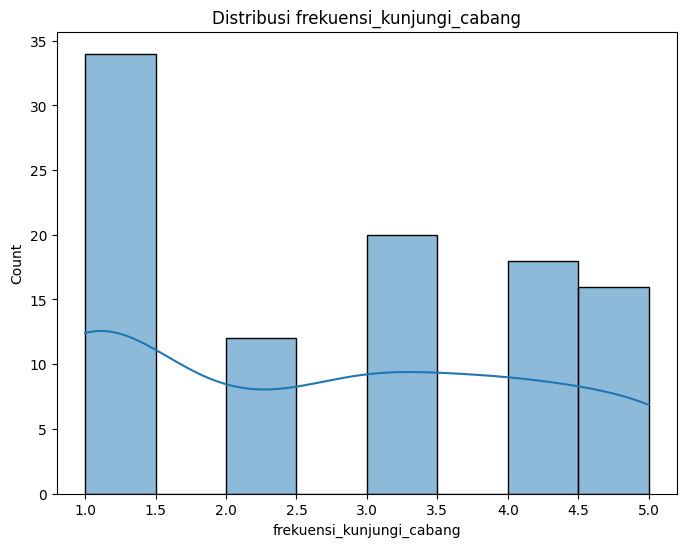

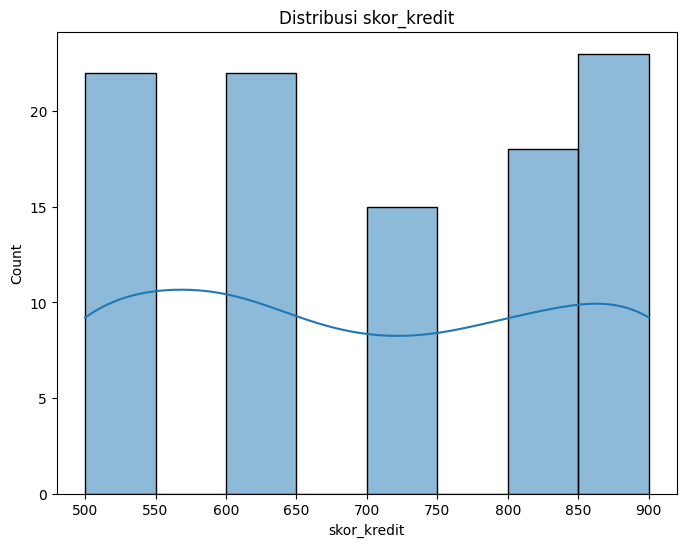

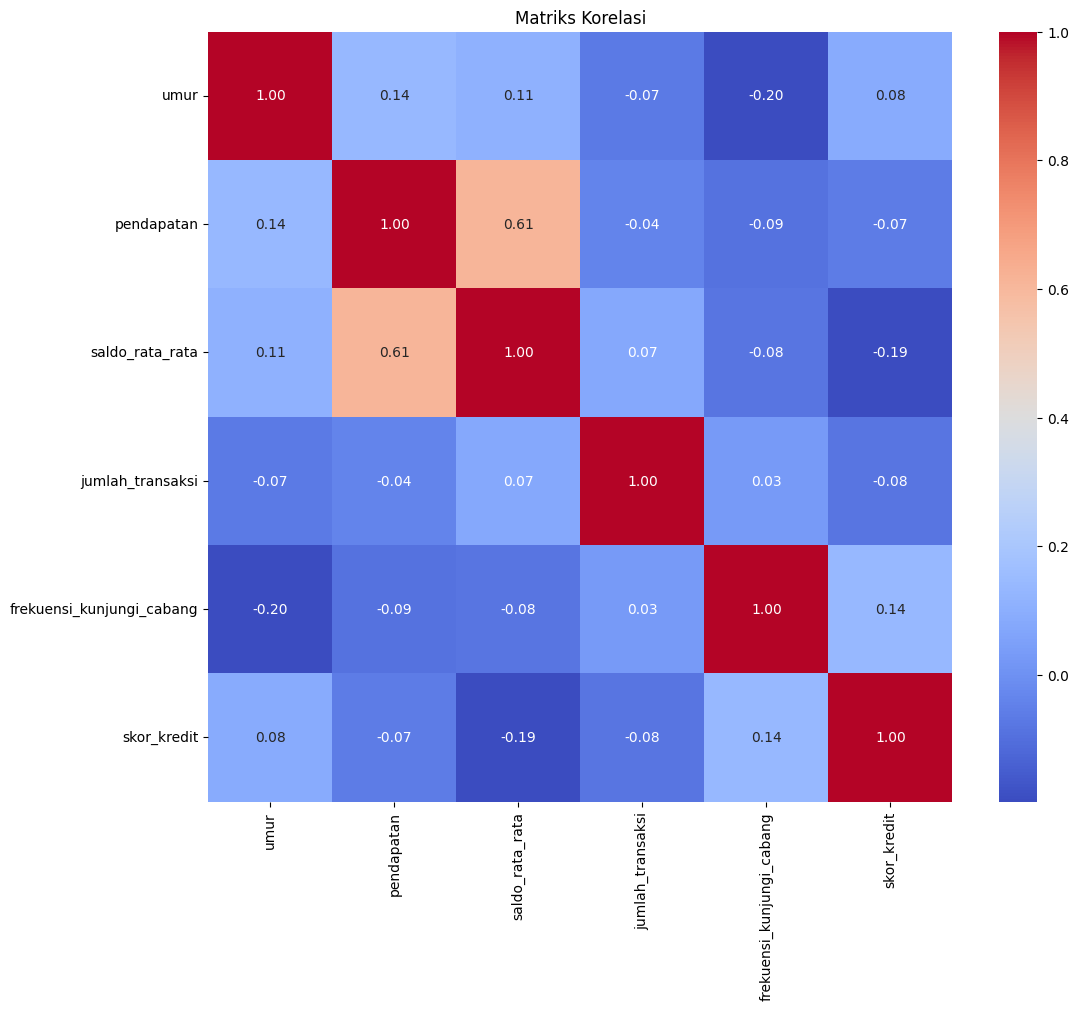

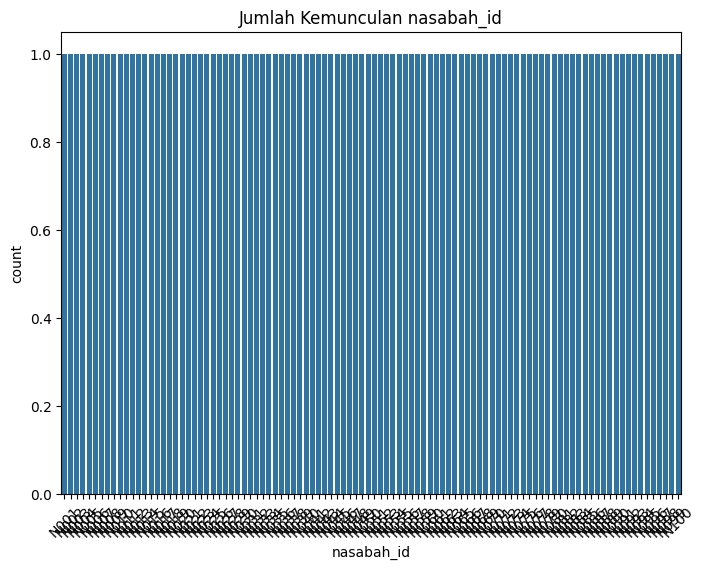

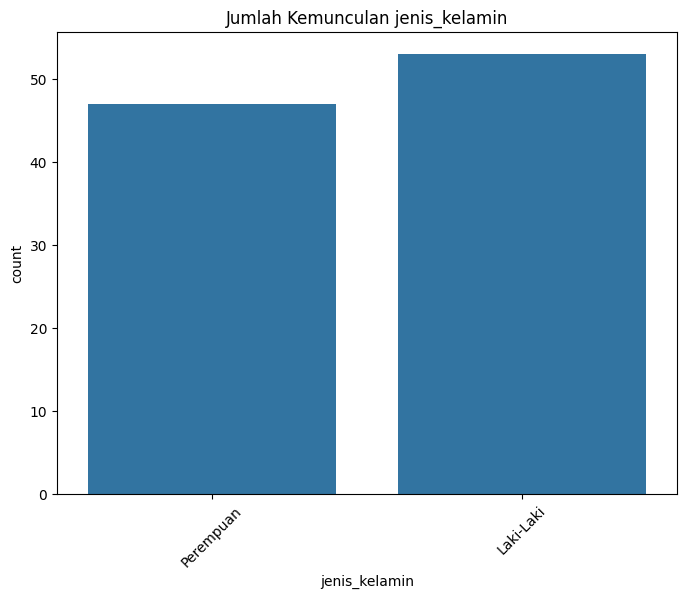

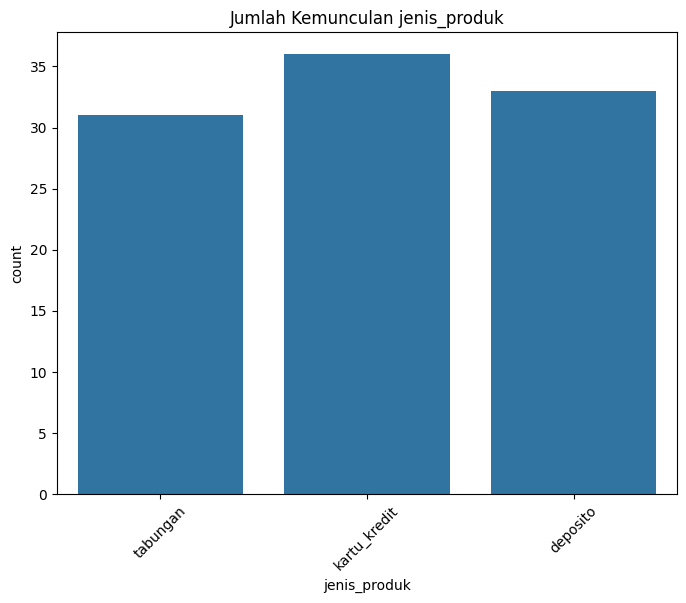

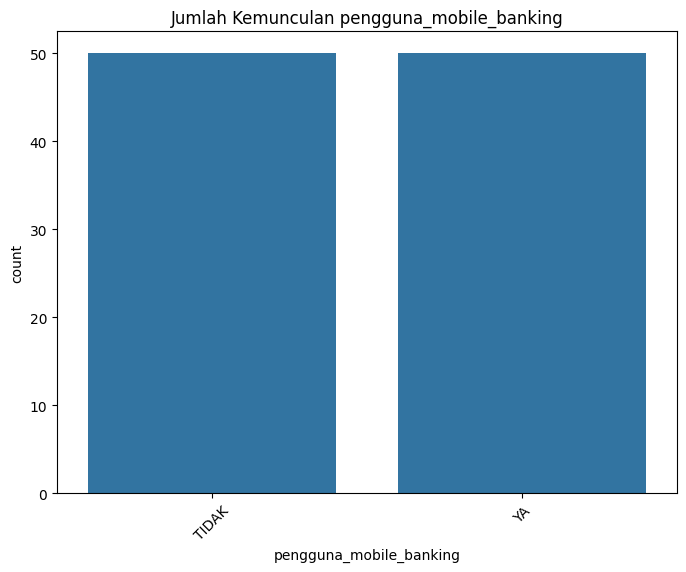


Jumlah Nilai Hilang Setiap Kolom:
nasabah_id                   0
umur                         0
jenis_kelamin                0
pendapatan                   0
saldo_rata_rata              0
jumlah_transaksi             0
jenis_produk                 0
frekuensi_kunjungi_cabang    0
pengguna_mobile_banking      0
skor_kredit                  0
dtype: int64


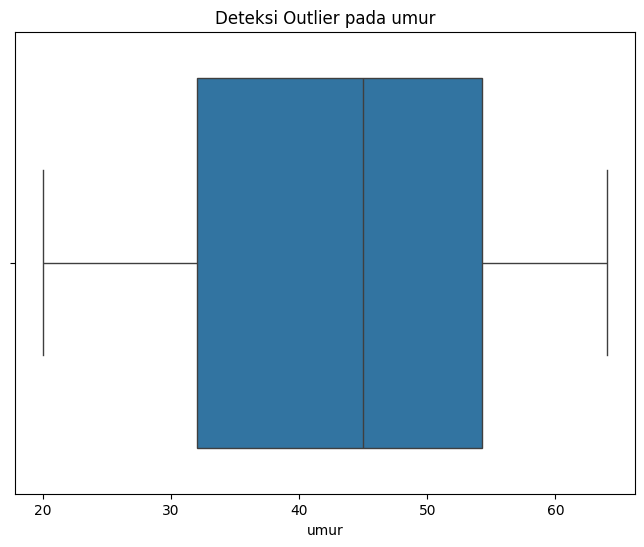

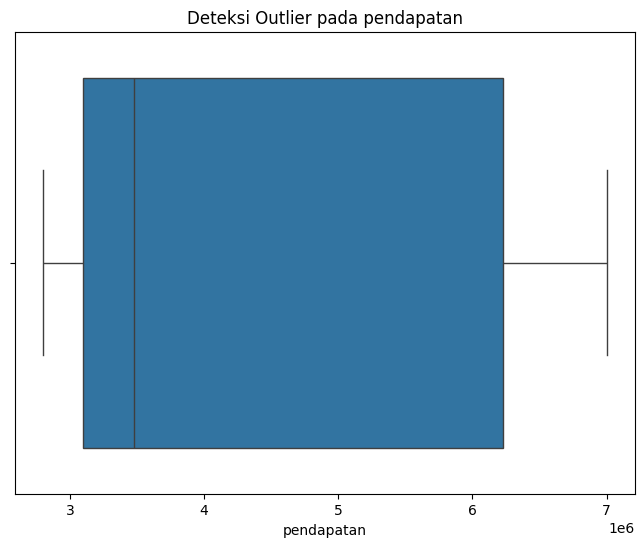

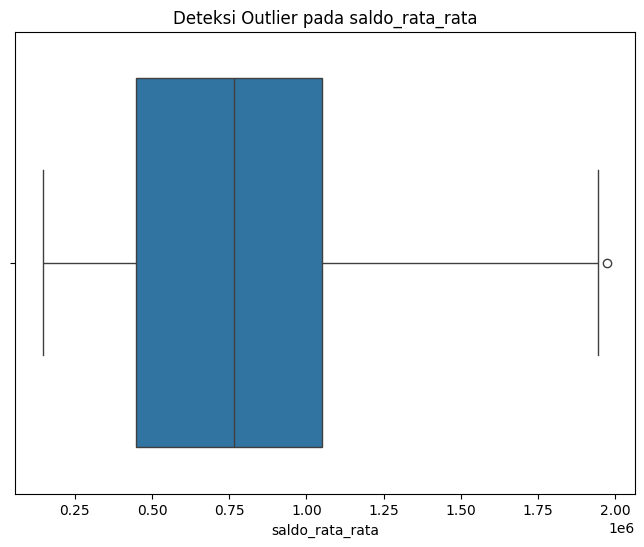

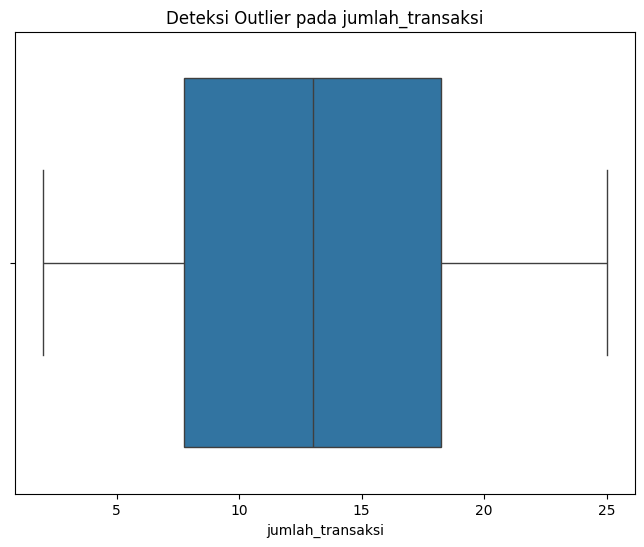

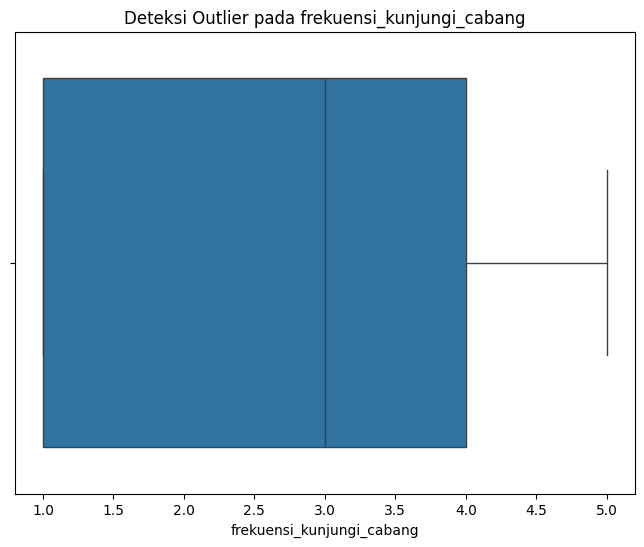

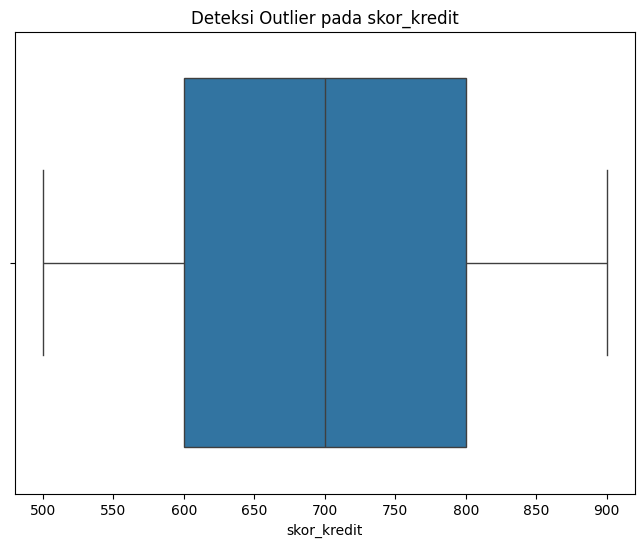

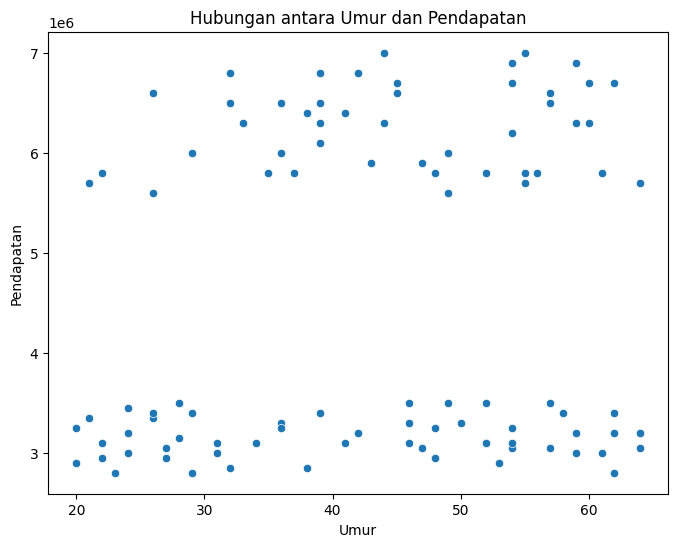

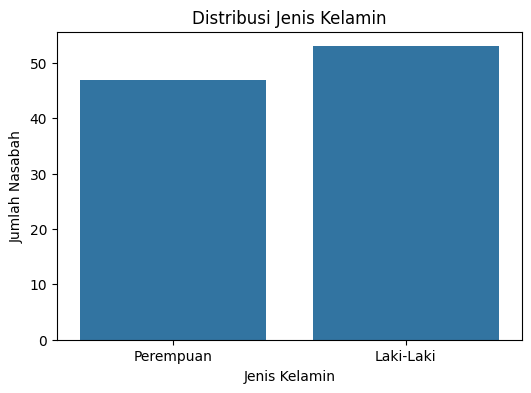

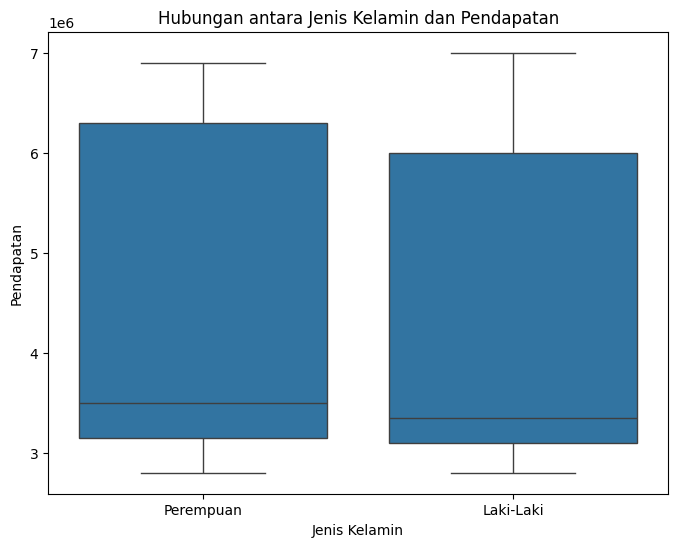

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Data_Nasabah.csv', delimiter=';')

print("\nLima Baris Pertama Data:")
print(data.head())

print("\nInformasi Data:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

print("\nJumlah Nilai Unik Setiap Kolom:")
for column in data.columns:
  print(f"{column}: {data[column].nunique()}")

numerical_features = data.select_dtypes(include=['number']).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f"Distribusi {feature}")
  plt.show()

correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=data)
  plt.title(f"Jumlah Kemunculan {feature}")
  plt.xticks(rotation=45)
  plt.show()

missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang Setiap Kolom:")
print(missing_values)

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[feature])
  plt.title(f"Deteksi Outlier pada {feature}")
  plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=data)
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='jenis_kelamin', data=data)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Nasabah')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin', y='pendapatan', data=data)
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan')
plt.show()